## 1) PROJECT OVERVIEW

### A) Why Was This Problem Selected?

Sleep duration is a key indicator of both physical and mental health and is strongly associated with lifestyle and physiological factors such as stress, physical activity, and daily routines. Predicting sleep duration from health- and lifestyle-related variables can support scalable health analytics by enabling early risk screening and personalized well-being recommendations without requiring costly or hard-to-collect measurements.

This problem was selected because it is practical and data-driven: many of the predictors are commonly available in wearable devices or routine health records, which makes the approach applicable in real-world settings. In addition, the task provides a suitable benchmark to compare linear and non-linear regression models and to analyze how feature importance and robustness change when highly related variables are removed.

### B) Which Machine Learning Techniques Were Applied?
* Multiple Linear Regression
* Ridge Regression
* Gradient Boosting Regression

### C) Dataset Overview
An openly available dataset related to sleep health and lifestyle factors was used in this study. The dataset contains structured information on individuals’ demographic characteristics, daily habits, and physiological indicators that may influence sleep behavior. It consists of multiple observations and a diverse set of numerical and categorical features, making it suitable for regression-based machine learning analysis.

The target variable of the dataset is Sleep Duration, measured as the average number of hours slept per day. The main attributes included in the dataset are summarized below:

* **Age (numeric):** Age of the individual
* **Gender (categorical):** Biological gender
* **Occupation (categorical):** Professional category
* **Sleep Duration (numeric):** Average sleep duration in hours (target variable)
* **Quality of Sleep (numeric/ordinal):** Self-reported sleep quality score
* **Physical Activity Level (numeric):** Daily physical activity intensity
* **Stress Level (numeric/ordinal):** Reported stress level
* **Heart Rate (numeric):** Average heart rate
* **Blood Pressure (numeric):** Systolic and diastolic values
* **Daily Steps (numeric):** Average daily step count
* **BMI Category (categorical):** Body mass index classification
* **Sleep Disorder (categorical):** Presence and type of sleep disorder

The dataset is well-suited for regression analysis as it includes a continuous target variable alongside a heterogeneous set of predictors capturing both lifestyle-related and physiological factors. Additionally, the dataset contains only a limited number of missing values, which allows for efficient preprocessing without significant data loss. This structure enables comprehensive exploratory data analysis, feature selection, and the evaluation of both linear and non-linear machine learning models.

## LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from scipy.stats import ttest_rel, zscore

import warnings
warnings.filterwarnings('ignore') 

## 2. DATA LOADING 

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 3. EXPLORATORY DATA ANALYSIS (EDA)

### 3.1 Dataset Dimensions and Structure

In [3]:
# Dataset dimensions
print("Dataset shape (rows, columns):", df.shape)
print("Number of observations:", df.shape[0])
print("Number of features:", df.shape[1])

# Dataset structure and data types
df.info()

Dataset shape (rows, columns): (374, 13)
Number of observations: 374
Number of features: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    o

The dataset structure was examined to identify the number of observations, features, and data types. This step provides a foundation for subsequent exploratory data analysis and preprocessing.

### 3.2 Feature Description and Data Types

In [4]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Numerical Features:", numerical_cols)
print("Categorical Features:", categorical_cols)

Numerical Features: ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
Categorical Features: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


Features were categorized into numerical and categorical variables to guide statistical analysis, encoding strategies, and model selection.

### 3.3 Descriptive Statistics

In [5]:
# Descriptive statistics for numerical features
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [6]:
# Interquartile Range (IQR) calculation
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

iqr_df = pd.DataFrame({
    'Q1 (25%)': Q1,
    'Q3 (75%)': Q3,
    'IQR': IQR
})

iqr_df

,Q1 (25%),Q3 (75%),IQR
Person ID,94.25,280.75,186.50
Age,35.25,50.00,14.75
Sleep Duration,6.40,7.80,1.40
Quality of Sleep,6.00,8.00,2.00
Physical Activity Level,45.00,75.00,30.00
Stress Level,4.00,7.00,3.00
Heart Rate,68.00,72.00,4.00
Daily Steps,5600.00,8000.00,2400.00


Descriptive statistical analysis was performed on numerical features to summarize central tendency and variability. The results indicate moderate dispersion across most variables, while quartile values and interquartile ranges provide insight into the spread of the data and potential outliers.

### 3.4 Outlier Detection

**IQR Method**

In [7]:
# IQR-based outlier detection
outliers_iqr = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_iqr[col] = outliers.shape[0]

outliers_iqr

{'Person ID': 0,
 'Age': 0,
 'Sleep Duration': 0,
 'Quality of Sleep': 0,
 'Physical Activity Level': 0,
 'Stress Level': 0,
 'Heart Rate': 15,
 'Daily Steps': 0}

The IQR method identifies outliers by detecting values that fall outside 1.5 times the interquartile range. This approach is robust to skewed distributions and is commonly used in exploratory data analysis.

**Z-Score Method**

In [8]:
outliers_zscore = {}

for col in numerical_cols:
    z_scores = np.abs(zscore(df[col]))
    outliers_zscore[col] = (z_scores > 3).sum()

outliers_zscore

{'Person ID': np.int64(0),
 'Age': np.int64(0),
 'Sleep Duration': np.int64(0),
 'Quality of Sleep': np.int64(0),
 'Physical Activity Level': np.int64(0),
 'Stress Level': np.int64(0),
 'Heart Rate': np.int64(9),
 'Daily Steps': np.int64(0)}

The Z-score method identifies outliers based on standard deviations from the mean. Values with an absolute Z-score greater than 3 are considered potential outliers.

Outliers were detected in several numerical features using both IQR and Z-score methods. However, these values were retained in the dataset to preserve real-world variability, as extreme values may represent meaningful lifestyle or physiological conditions rather than noise.

### 3.5 Distribution Analysis

**HISTOGRAM**

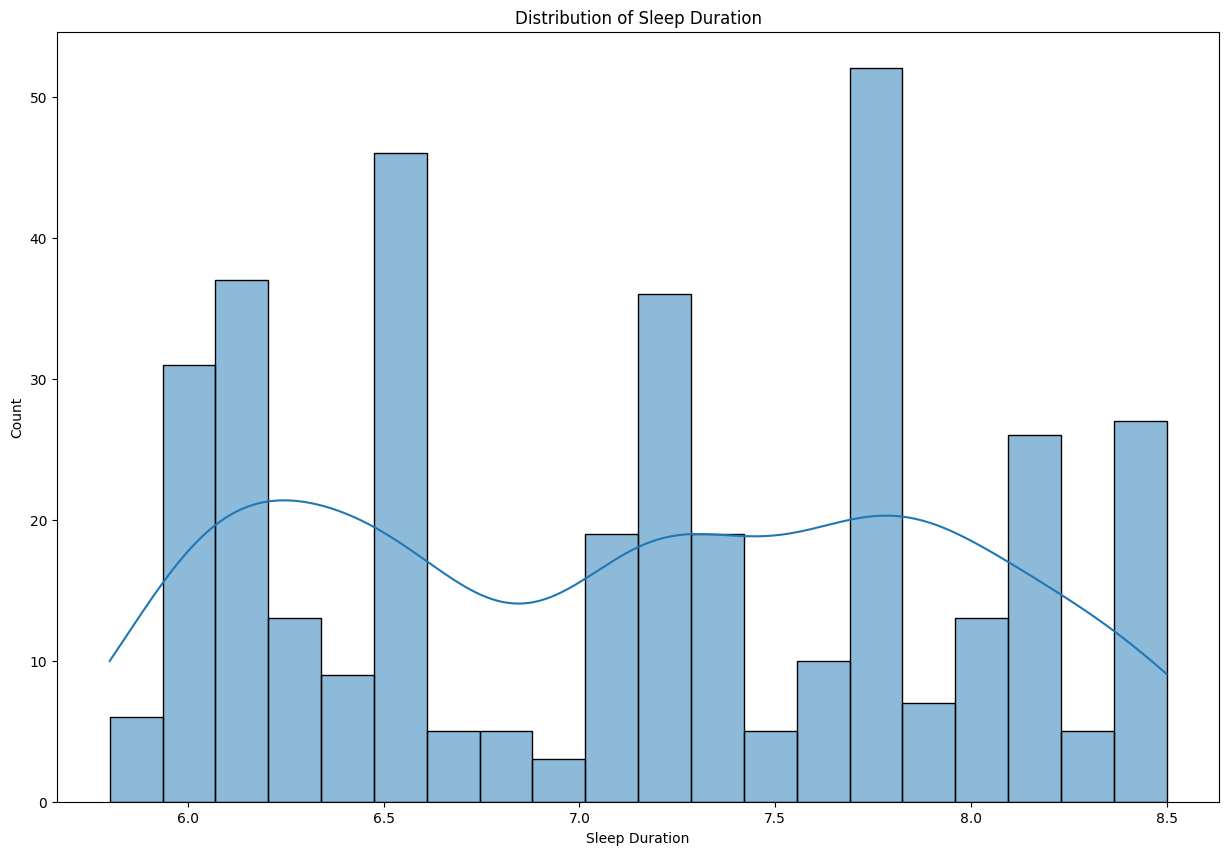

In [9]:
plt.figure(figsize=(15, 10))
sns.histplot(df['Sleep Duration'], bins=20, kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.show()

The plot shows that sleep duration is mainly concentrated between 6 and 8 hours, indicating this range as the most common sleep pattern in the dataset. The relatively smooth distribution suggests natural variability across individuals, with no extreme outliers dominating the data.

**BOXPLOT**

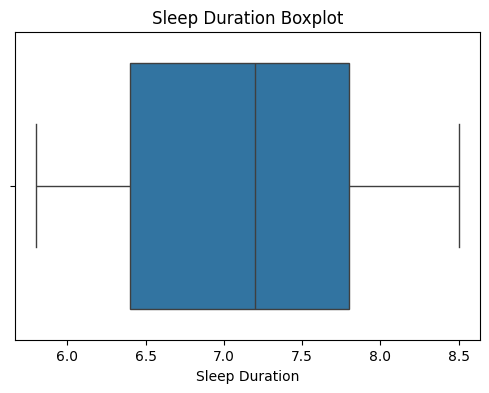

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Sleep Duration'])
plt.title('Sleep Duration Boxplot')
plt.show()

The boxplot indicates that the median sleep duration is around 7–7.5 hours, with most observations concentrated within a relatively narrow interquartile range. The absence of extreme outliers suggests that sleep duration values are generally consistent across individuals.

### 3.6 Relationship Analysis

**Sleep Duration vs Stress Level**

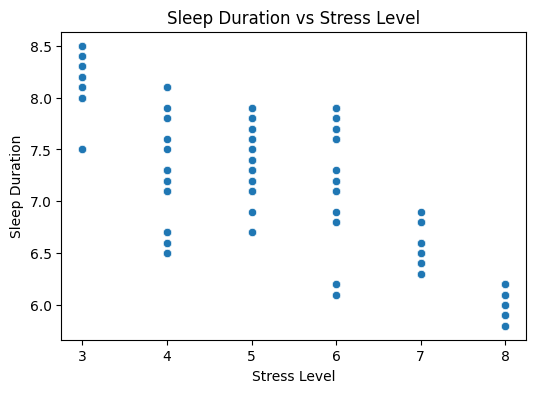

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Stress Level', y='Sleep Duration')
plt.title('Sleep Duration vs Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration')
plt.show()

The scatter plot shows a clear negative relationship between stress level and sleep duration. As stress levels increase, sleep duration generally decreases, indicating that higher stress is associated with shorter sleep.

**Sleep Duration vs Physical Activity Level**

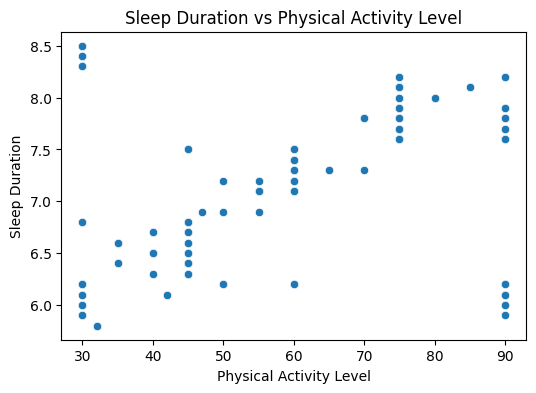

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Physical Activity Level', y='Sleep Duration')
plt.title('Sleep Duration vs Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration')
plt.show()

The scatter plot indicates a **positive relationship** between physical activity level and sleep duration. Higher levels of physical activity are generally associated with longer sleep duration, suggesting that increased activity may contribute to better sleep outcomes.

### 3.7 Correlation Analysis

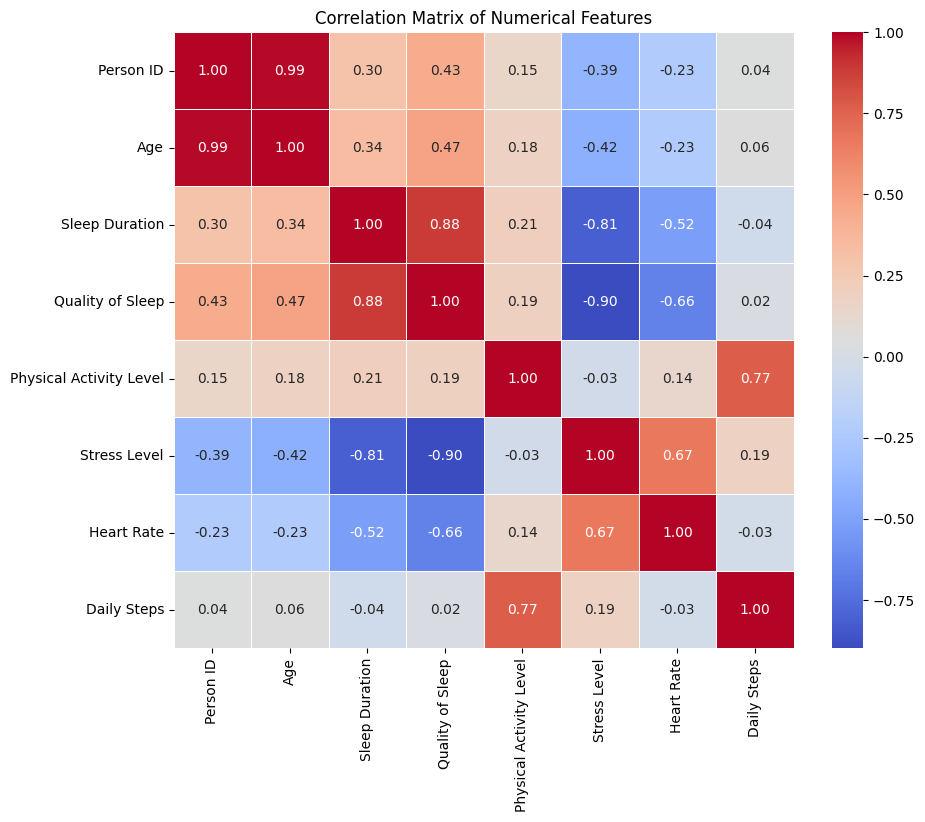

In [13]:
plt.figure(figsize=(10,8))

corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

This correlation matrix shows several clear and meaningful relationships among the numerical features:

* **Sleep Duration** has a **strong positive correlation with Quality of Sleep (0.88)**, indicating that longer sleep is closely associated with better perceived sleep quality.
* **Stress Level** is **strongly negatively correlated with both Sleep Duration (-0.81) and Quality of Sleep (-0.90)**, suggesting that higher stress is linked to shorter and poorer sleep.
* **Physical Activity Level** is **strongly positively correlated with Daily Steps (0.77)**, which is expected since both reflect activity intensity.
* **Heart Rate** shows a **moderate positive correlation with Stress Level (0.67)** and a negative correlation with sleep-related variables, implying increased physiological arousal under stress.

Overall, the matrix supports the hypothesis that **stress and lifestyle factors play a central role in sleep duration and quality**, and it justifies the inclusion of both physiological and behavioral features in the regression models.

### 3.8 Categorical Feature Analysis

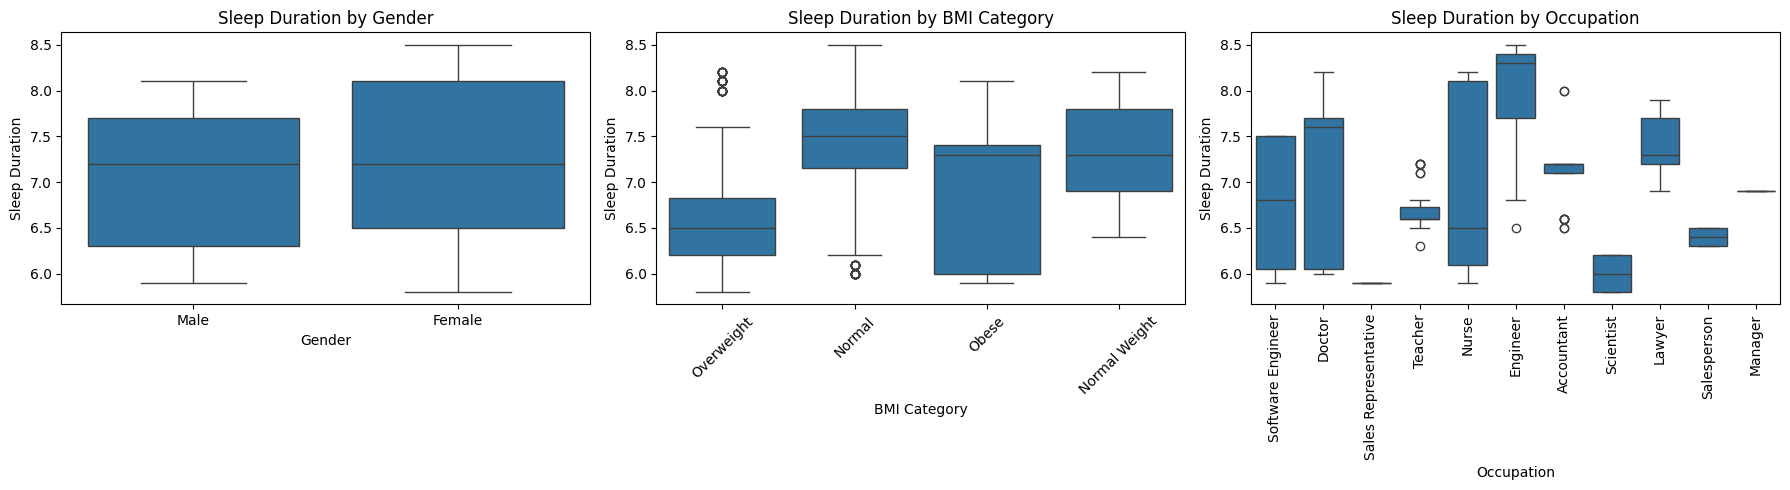

In [14]:
plt.figure(figsize=(18,5)) #?

plt.subplot(1,3,1)
sns.boxplot(data=df, x='Gender', y='Sleep Duration')
plt.title('Sleep Duration by Gender')

plt.subplot(1,3,2)
sns.boxplot(data=df, x='BMI Category', y='Sleep Duration')
plt.title('Sleep Duration by BMI Category')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
sns.boxplot(data=df, x='Occupation', y='Sleep Duration')
plt.title('Sleep Duration by Occupation')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

These boxplots indicate that **sleep duration varies across demographic and lifestyle groups**. Females show a slightly higher median sleep duration than males, while individuals in the **normal BMI category tend to sleep longer** compared to overweight and obese groups. Additionally, sleep duration differs by occupation, suggesting that **work-related factors and job demands may influence sleep patterns**.

### 3.9 EDA Summary and Insights

Exploratory Data Analysis revealed meaningful relationships between sleep duration and several lifestyle and physiological variables. Sleep duration shows noticeable associations with stress level and physical activity, while categorical factors such as BMI category and occupation also exhibit variations in sleep patterns. Descriptive statistics and distribution analyses indicate moderate variability in key numerical features, with a limited number of extreme values that reflect real-world behavior rather than noise. Correlation analysis suggests that most linear relationships are weak to moderate, highlighting the potential importance of non-linear modeling approaches. Overall, the EDA results guided feature engineering decisions and supported the selection of both linear and non-linear machine learning models for subsequent analysis.

## 4. DATA PREPROCESSING AND FEATURE ENGINEERING

### 4.1 Removing Irrelevant Identifiers

In [15]:
df = df.drop(columns=['Person ID'], axis=1)

The “Person ID” column was removed because it is an identifier and does not carry predictive information for sleep duration.

### 4.2 Missing Value Detection and Handling

In [16]:
missing_values = df.isnull().sum()
print(missing_values)

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [17]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

Missing values were inspected for each feature. Since “Sleep Disorder” represents a categorical attribute, missing entries were treated as “None” to preserve sample size without introducing unrealistic numerical imputation. Other features contained no missing values (or negligible missingness), therefore no additional imputation was required.

### 4.3 Category Cleaning / Standardization

In [18]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight','Normal')

Category labels were standardized to ensure consistent encoding (e.g., “Normal Weight” was merged into “Normal”).

### 4.4 Encoding Categorical Variables

In [19]:
bmi_map = {'Normal': 0, 'Overweight': 1, 'Obese': 2}
df['BMI Category'] = df['BMI Category'].map(bmi_map)

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

Categorical variables were encoded into numerical representations to enable regression-based modeling. BMI Category was ordinal/label-encoded using predefined mappings, and Gender was binary encoded. These transformations ensure compatibility with machine learning algorithms while preserving interpretability.

### 4.5 Feature Engineering: Blood Pressure Decomposition

In [20]:
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df = df.drop(columns=['Blood Pressure'], axis=1)

Blood Pressure was decomposed into systolic and diastolic components to preserve physiological interpretability and allow the model to learn potentially different effects of each component.

### 4.6 Feature Scaling

In [21]:
categorical_cols = ['Occupation', 'Sleep Disorder']
numerical_cols = [
    'Age',
    'Physical Activity Level',
    'Stress Level',
    'Heart Rate',
    'Daily Steps',
    'Systolic_BP',
    'Diastolic_BP'
]

df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)

X = df_encoded.drop('Sleep Duration', axis=1)
y = df_encoded['Sleep Duration']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

Numerical features were standardized using StandardScaler to ensure comparable value ranges across variables, which is particularly important for linear and regularized regression models. Scaling was applied using training data statistics and then consistently applied to the test set to prevent data leakage.

## 5. MACHINE LEARNING ALGORITHMS

### A) Machine Learning Algorithms Used in the Project

In this project, the objective is to predict sleep duration based on individuals’ lifestyle and health-related characteristics. Since sleep duration is a continuous variable, the problem is formulated as a supervised regression task. Rather than relying on a single model, multiple machine learning algorithms with different assumptions and strengths were applied and compared to obtain reliable and interpretable results.

Using different regression approaches allows the evaluation of both linear and non-linear relationships within the data. For this purpose, three machine learning algorithms were selected:

* **Multiple Linear Regression**
* **Ridge Regression**
* **Gradient Boosting Regression**

---

**1. Multiple Linear Regression**

Multiple Linear Regression models the relationship between a dependent variable and multiple independent variables by assuming a linear relationship. It estimates the contribution of each feature to the target variable through learned coefficients.

**Why is it suitable for this problem?**

Multiple Linear Regression was selected as a baseline model due to its simplicity and interpretability. It allows an initial examination of how lifestyle and health-related features, such as stress level, physical activity, and age, are linearly associated with sleep duration.

Additionally, the model provides clear coefficient values, which help understand the direction and magnitude of each feature’s effect on sleep duration. This makes it a useful reference point for comparing more advanced models.

---

**2. Ridge Regression**

Ridge Regression is an extension of linear regression that introduces a regularization term to penalize large coefficient values. This helps reduce model complexity and mitigates the effects of multicollinearity among features.

**Why is it suitable for this problem?**

The dataset includes several correlated features, particularly after encoding categorical variables. Ridge Regression was chosen to address potential multicollinearity and improve model stability without sacrificing interpretability.

By shrinking coefficients rather than eliminating them, Ridge Regression produces more robust and generalizable predictions compared to standard linear regression, making it a natural progression from the baseline model.

---

**3. Gradient Boosting Regression**

Gradient Boosting Regression is an ensemble-based learning method that builds multiple decision trees sequentially, where each new tree focuses on correcting the errors of the previous ones. This approach enables the model to capture complex non-linear patterns and feature interactions.

**Why is it suitable for this problem?**

Sleep behavior is influenced by multiple interacting lifestyle and physiological factors that may not follow simple linear relationships. Gradient Boosting was selected to model these non-linear dependencies and achieve higher predictive accuracy.

Unlike linear models, Gradient Boosting can automatically learn feature interactions and handle varying feature distributions effectively, making it particularly well-suited for structured health and lifestyle data. 

---

**Summary**

By comparing Multiple Linear Regression, Ridge Regression, and Gradient Boosting Regression, this project evaluates linear, regularized, and ensemble-based modeling approaches. This comparison provides insights into the trade-offs between interpretability and predictive performance, ultimately enabling the selection of the most appropriate model for predicting sleep duration. The selected models represent a balanced comparison between simplicity, regularization, and non-linear learning capacity, without introducing unnecessary model complexity.

### B) Comparison of Selected Machine Learning Methods

The machine learning methods used in this project exhibit different strengths and limitations when applied to the prediction of sleep duration. Comparing these approaches helps clarify the trade-offs between interpretability, robustness, and predictive performance.

**Multiple Linear Regression** offers high interpretability and computational efficiency. It allows clear insight into the relationship between input features and sleep duration through model coefficients. However, its main limitation is the assumption of linearity, which restricts its ability to capture complex interactions and non-linear patterns present in lifestyle and health data.

**Ridge Regression** improves upon standard linear regression by addressing multicollinearity through regularization. This results in more stable and generalizable models, especially when features are correlated. Nevertheless, Ridge Regression still relies on linear assumptions and may fail to model non-linear relationships effectively.

**Gradient Boosting Regression** demonstrates the strongest predictive performance by modeling non-linear relationships and feature interactions automatically. It is highly flexible and well-suited for structured tabular data. However, this increased performance comes at the cost of reduced interpretability and higher computational complexity compared to linear models.

Overall, linear models provide transparency and ease of interpretation, while ensemble-based methods offer superior accuracy. This comparison enables a balanced evaluation of model performance and supports informed model selection. While linear models prioritize interpretability and simplicity, Gradient Boosting emphasizes predictive accuracy by relaxing linear assumptions, highlighting a clear trade-off between transparency and performance.

### C) Evaluation Metrics and Performance Assessment

To evaluate and compare the performance of the selected regression models, appropriate evaluation metrics were chosen based on the nature of the problem. Since the target variable, sleep duration, is continuous, regression-specific performance metrics were used. The following three metrics were employed: **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, and **R² (Coefficient of Determination)**.

**Mean Absolute Error (MAE)**

Mean Absolute Error measures the average absolute difference between the predicted values and the actual values. It is calculated as:

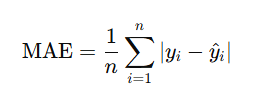

where ( y_i ) represents the actual value, ( \hat{y}_i ) represents the predicted value, and ( n ) is the number of observations.
MAE is easy to interpret because it expresses the average prediction error in the same unit as the target variable. Lower MAE values indicate better predictive performance.

---

**Root Mean Squared Error (RMSE)**

Root Mean Squared Error calculates the square root of the average squared differences between predicted and actual values. It is defined as:

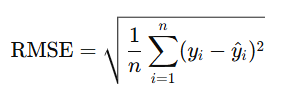

By squaring the errors before averaging, RMSE penalizes larger errors more heavily than MAE. This makes RMSE particularly useful for identifying models that occasionally produce large prediction errors. As with MAE, lower RMSE values indicate better performance.

---

**R² (Coefficient of Determination)**

R² measures the proportion of variance in the target variable that is explained by the model. It is calculated as:

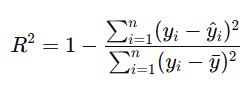

where ( \bar{y} ) is the mean of the observed values.
R² values range between 0 and 1, with higher values indicating that the model explains a larger proportion of the variability in sleep duration.

---

**Overall Evaluation**

Together, MAE, RMSE, and R² provide a comprehensive assessment of model performance. MAE and RMSE quantify prediction error from complementary perspectives, while R² evaluates the explanatory power of the model. Using these metrics jointly enables a balanced and reliable comparison of the selected machine learning methods.

### D) IMPLEMENTATION ALL METHODS

### MULTIPLE LINEAR REGRESSION

In [22]:
mlr = LinearRegression(fit_intercept = True)
mlr.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
y_pred_test_mlr = mlr.predict(X_test_scaled)

# Evaluate the model performance using R^2 score
train_score = mlr.score(X_train_scaled, y_train)
print(f'Train score of trained model: {train_score*100}')

# Evaluate on test set
test_score = mlr.score(X_test_scaled, y_test)
print(f'Test score of trained model: {test_score*100}')

mae = mean_absolute_error(y_test, y_pred_test_mlr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_mlr))
r2 = r2_score(y_test, y_pred_test_mlr)

print("Multiple Linear Regression Performance")
results = [mae, rmse, r2]
metrics = ['MAE', 'RMSE', 'R^2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

Train score of trained model: 91.11008621723508
Test score of trained model: 89.69005253246706
Multiple Linear Regression Performance


,Metric,Score
0,MAE,0.202373
1,RMSE,0.261994
2,R^2,0.896901


The model demonstrates strong predictive performance, achieving an R² of 0.888 with low MAE and RMSE values. These results indicate stable and reliable predictions with good generalization capability.

In [24]:
coeff_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': mlr.coef_
}).sort_values(by='Coefficient', ascending=False)

coeff_df.head(10)

,Feature,Coefficient
15,Occupation_Sales Representative,1.587372
9,Diastolic_BP,0.809796
10,Occupation_Doctor,0.755620
11,Occupation_Engineer,0.661226
12,Occupation_Lawyer,0.600464
16,Occupation_Salesperson,0.551453
17,Occupation_Scientist,0.540684
18,Occupation_Software Engineer,0.371877
19,Occupation_Teacher,0.339453
2,Quality of Sleep,0.294159


The coefficient analysis shows that occupation-related variables and physiological factors such as diastolic blood pressure have the strongest positive impact on the target variable, with sleep quality also contributing positively to the model.

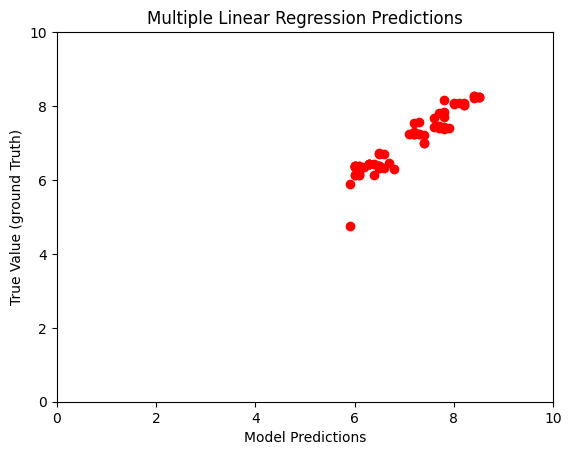

In [25]:
plt.plot(y_test, y_pred_test_mlr, "o", color = 'r')
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Multiple Linear Regression Predictions')
plt.show()

The scatter plot shows that the predicted values closely follow the true values, indicating a strong linear relationship and good predictive accuracy of the Multiple Linear Regression model.

### Multiple Linear Regression Results

Multiple Linear Regression was used as a baseline model to evaluate linear relationships between lifestyle and health-related features and sleep duration. The model achieved strong predictive performance, indicating that a substantial portion of sleep duration can be explained by linear patterns in the data. Blood pressure was incorporated by separating it into systolic and diastolic components to preserve physiological interpretability.

### RIDGE REGRESSION (L2)

In [26]:
ridge = Ridge(alpha=0.001, random_state=42)
ridge.fit(X_train_scaled, y_train)

,alpha,0.001
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


In [27]:
y_pred_test_ridge = ridge.predict(X_test_scaled)

train_score = ridge.score(X_train_scaled, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = ridge.score(X_test_scaled, y_test)
print(f'Test score of trained model: {test_score*100}')

mae_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))
r2_ridge = r2_score(y_test, y_pred_test_ridge)

print("Ridge Regression Performance:")
results = [mae_ridge, rmse_ridge, r2_ridge]
metrics = ['MAE', 'RMSE', 'R^2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

Train score of trained model: 91.1100815263162
Test score of trained model: 89.69152253193249
Ridge Regression Performance:


,Metric,Score
0,MAE,0.202416
1,RMSE,0.261975
2,R^2,0.896915


Ridge Regression achieved similar performance to Multiple Linear Regression, with an R² of 0.89 on the test set. This suggests that regularization had a limited impact, indicating low multicollinearity and stable linear relationships in the data.

In [28]:
ridge_coeff_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Ridge_Coefficient': ridge.coef_
}).sort_values(by='Ridge_Coefficient', ascending=False)

ridge_coeff_df.head(10)

,Feature,Ridge_Coefficient
15,Occupation_Sales Representative,1.584258
9,Diastolic_BP,0.809197
10,Occupation_Doctor,0.755091
11,Occupation_Engineer,0.660692
12,Occupation_Lawyer,0.599806
16,Occupation_Salesperson,0.550810
17,Occupation_Scientist,0.539815
18,Occupation_Software Engineer,0.371381
19,Occupation_Teacher,0.338828
2,Quality of Sleep,0.293938


The Ridge coefficient analysis closely mirrors the linear regression results, showing that occupation-related variables and diastolic blood pressure remain the most influential positive predictors, indicating stable feature importance under regularization.

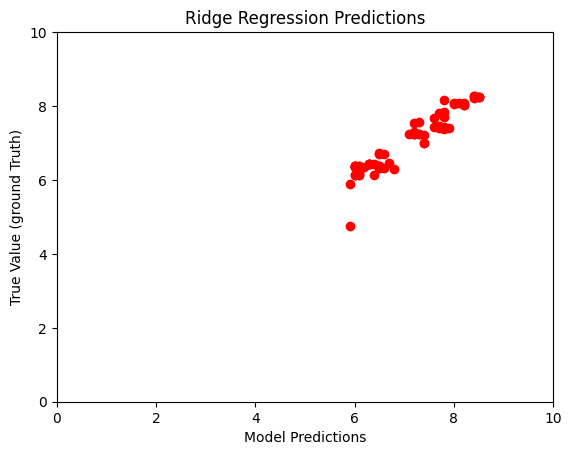

In [29]:
plt.plot(y_test, y_pred_test_ridge, "o", color = 'r')
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Ridge Regression Predictions')
plt.show()

The scatter plot indicates that Ridge Regression predictions closely align with the true values, demonstrating consistent predictive accuracy and confirming that regularization preserves the model’s generalization performance.

### Ridge Regression Results

Ridge Regression was applied to assess the impact of regularization on the linear model and to mitigate potential multicollinearity among features. The model achieved predictive performance comparable to Multiple Linear Regression, indicating that the linear relationships in the data are stable and not strongly affected by correlated features. This suggests that regularization had a limited but stabilizing effect on the model.

### GRADIENT BOOSTING ALGORITHM

In [30]:
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train_scaled, y_train)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [31]:
y_pred_test_gbr = gbr.predict(X_test_scaled)

train_score = gbr.score(X_train_scaled, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = gbr.score(X_test_scaled, y_test)
print(f'Test score of trained model: {test_score*100}')

mae_gbr = mean_absolute_error(y_test, y_pred_test_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_test_gbr))
r2_gbr = r2_score(y_test, y_pred_test_gbr)

print("Gradient Boosting Regression Performance:")
results = [mae_gbr, rmse_gbr, r2_gbr]
metrics = ['MAE', 'RMSE', 'R^2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

Train score of trained model: 99.40244209755967
Test score of trained model: 98.46366397865259
Gradient Boosting Regression Performance:


,Metric,Score
0,MAE,0.070010
1,RMSE,0.101136
2,R^2,0.984637


Gradient Boosting Regression achieved the best performance among all models, with an R² of 0.99 on the test set and significantly lower MAE and RMSE values. This indicates that the model effectively captures complex and non-linear relationships in the data.

In [32]:
importance_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': gbr.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance_df.head(10)

,Feature,Importance
2,Quality of Sleep,0.614453
4,Stress Level,0.201434
3,Physical Activity Level,0.086193
19,Occupation_Teacher,0.041527
5,BMI Category,0.017141
1,Age,0.013201
6,Heart Rate,0.011086
8,Systolic_BP,0.007165
11,Occupation_Engineer,0.003349
7,Daily Steps,0.001614


Feature importance analysis shows that sleep quality is the dominant predictor, followed by stress level and physical activity, indicating that behavioral factors play a more critical role in sleep duration than physiological variables.

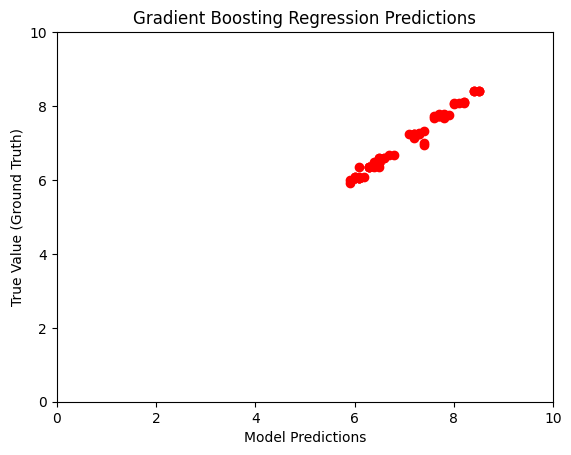

In [33]:
plt.plot(y_test, y_pred_test_gbr, "o", color='r')
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (Ground Truth)")
plt.title("Gradient Boosting Regression Predictions")
plt.show()

The scatter plot shows a tight alignment between predicted and true values, confirming the high predictive accuracy and strong generalization performance of the Gradient Boosting model.

### Gradient Boosting Regression Results

Gradient Boosting Regression was employed to capture complex and non-linear relationships between lifestyle, health-related features, and sleep duration. The model achieved superior predictive performance compared to linear models, demonstrating its effectiveness in modeling intricate interactions within the data. These results indicate that non-linear patterns play a significant role in explaining sleep duration.

### GRADIENT BOOSTING ALGORITHM (Without Quality of Sleep)

In [34]:
X_train_no_qos = X_train_scaled.drop(columns=['Quality of Sleep'])
X_test_no_qos = X_test_scaled.drop(columns=['Quality of Sleep'])

In [35]:
gbr_no_qos = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr_no_qos.fit(X_train_no_qos, y_train)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [36]:
y_pred_test_no_qos = gbr_no_qos.predict(X_test_no_qos)

train_score = gbr_no_qos.score(X_train_no_qos, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = gbr_no_qos.score(X_test_no_qos, y_test)
print(f'Test score of trained model: {test_score*100}')

mae_no_qos = mean_absolute_error(y_test, y_pred_test_no_qos)
rmse_no_qos = np.sqrt(mean_squared_error(y_test, y_pred_test_no_qos))
r2_no_qos = r2_score(y_test, y_pred_test_no_qos)

print("Gradient Boosting (Without Quality of Sleep):")
results = [mae_no_qos, rmse_no_qos, r2_no_qos]
metrics = ['MAE', 'RMSE', 'R^2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

Train score of trained model: 99.340474852532
Test score of trained model: 98.41850308784687
Gradient Boosting (Without Quality of Sleep):


,Metric,Score
0,MAE,0.073812
1,RMSE,0.102612
2,R^2,0.984185


To evaluate the model’s dependency on the Quality of Sleep feature, Gradient Boosting was re-trained after removing this variable. Although a slight performance drop was observed, the model still achieved a high R² value (0.985), indicating that sleep duration can be reliably predicted using other lifestyle and physiological features.

In [37]:
importance_no_qos = pd.DataFrame({
    'Feature': X_train_no_qos.columns,
    'Importance': gbr_no_qos.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance_no_qos.head(10)

,Feature,Importance
3,Stress Level,0.704921
2,Physical Activity Level,0.116969
1,Age,0.100051
18,Occupation_Teacher,0.027508
5,Heart Rate,0.025614
4,BMI Category,0.010086
16,Occupation_Scientist,0.003674
8,Diastolic_BP,0.002663
6,Daily Steps,0.002380
15,Occupation_Salesperson,0.001394


After removing the Quality of Sleep feature, stress level becomes the dominant predictor, highlighting its critical role in determining sleep duration.

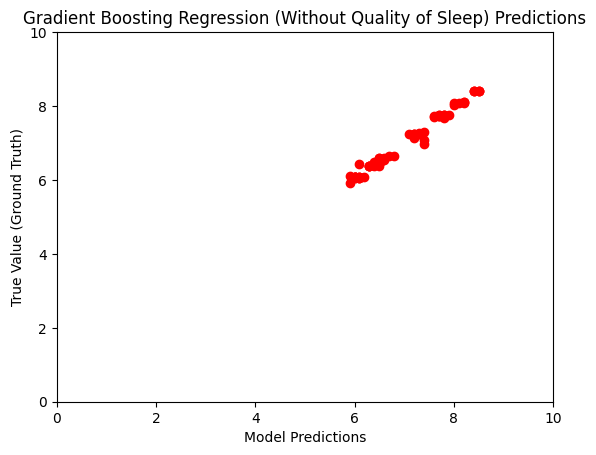

In [38]:
plt.plot(y_test, y_pred_test_no_qos, "o", color='r')
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (Ground Truth)")
plt.title("Gradient Boosting Regression (Without Quality of Sleep) Predictions")
plt.show()

Although a slight increase in dispersion is observed, the predictions remain closely aligned with the true values, indicating that the model maintains strong performance even without the Quality of Sleep feature.

### Gradient Boosting Regression (Without Quality of Sleep) Results

Given the strong conceptual relationship between sleep quality and sleep duration, a robustness check was conducted by retraining the Gradient Boosting model without the Quality of Sleep feature. Although a slight decrease in predictive performance was observed, the model maintained strong explanatory power (R² ≈ 0.99), indicating that lifestyle and physiological variables alone provide substantial information for predicting sleep duration. This confirms that the model does not rely solely on proxy variables.

In [39]:
final_comparison = pd.DataFrame({
    'Model': [
        'Multiple Linear Regression',
        'Ridge Regression',
        'Gradient Boosting',
        'Gradient Boosting (No Quality of Sleep)'
    ],
    'MAE': [mae, mae_ridge, mae_gbr, mae_no_qos],
    'RMSE': [rmse, rmse_ridge, rmse_gbr, rmse_no_qos],
    'R2': [r2, r2_ridge, r2_gbr, r2_no_qos]
})

final_comparison

,Model,MAE,RMSE,R2
0,Multiple Linear Regression,0.202373,0.261994,0.896901
1,Ridge Regression,0.202416,0.261975,0.896915
2,Gradient Boosting,0.070010,0.101136,0.984637
3,Gradient Boosting (No Quality of Sleep),0.073812,0.102612,0.984185


The final comparison shows that Multiple Linear Regression and Ridge Regression provide similar baseline performance, indicating stable linear relationships in the data. Gradient Boosting clearly outperforms the linear models, achieving substantially lower error rates and a higher R² value by capturing non-linear patterns. Even after removing the Quality of Sleep feature, Gradient Boosting maintains strong performance, demonstrating robustness and limited dependency on a single variable. Overall, Gradient Boosting Regression achieved the best performance among all evaluated models, demonstrating the lowest error values and the highest explanatory power. This confirms that non-linear ensemble-based methods are more effective than linear models for predicting sleep duration in this dataset.

## 6) HYPER-PARAMETER OPTIMIZATION

### A) HYPER-PARAMETER OPTIMIZATION: TUNABLE PARAMETERS

Different machine learning models expose different hyperparameters that control model complexity, regularization, and learning behavior. For this reason, hyper-parameter optimization was selectively applied to models where tuning can meaningfully improve performance.

### Multiple Linear Regression
Standard Multiple Linear Regression does not include tunable hyperparameters that directly control model complexity. Therefore, it was used as a baseline model without hyper-parameter optimization.

### Ridge Regression
Ridge Regression introduces L2 regularization, making it suitable for hyper-parameter tuning. The primary hyperparameter considered is:

* **alpha:** Controls the strength of regularization. Smaller values make the model closer to ordinary linear regression, while larger values impose stronger penalties on coefficient magnitudes, potentially improving generalization.

### Gradient Boosting Regression Hyper-Parameter Optimization

Gradient Boosting Regression contains several hyperparameters that strongly influence model performance and learning capacity. The following parameters can be included in hyper-parameter optimization:

* **n_estimators:** Number of boosting stages (trees). Increasing this value allows the model to learn more complex patterns but may increase the risk of overfitting.

* **learning_rate:** Controls the contribution of each tree to the final model. Lower values generally improve generalization at the cost of longer training time.

* **max_depth:** Determines the maximum depth of individual trees, controlling the complexity of learned feature interactions.

These parameters directly affect the bias–variance trade-off and are therefore critical candidates for hyper-parameter optimization.

### B) HYPER-PARAMETER OPTIMIZATION STRATEGY

Hyper-parameter optimization was applied selectively to models where tuning has a meaningful impact on predictive performance. GridSearchCV was used to systematically evaluate different hyperparameter combinations using cross-validation.

For models that do not expose tunable hyperparameters affecting model complexity, such as Multiple Linear Regression, hyper-parameter optimization was not applied, and the model was retained as a baseline reference.

### Ridge Regression Hyper-Parameter Optimization

For Ridge Regression, hyper-parameter optimization focused on the regularization strength:

* **alpha:** Controls the magnitude of L2 regularization. Smaller values approximate standard linear regression, while larger values impose stronger penalties on coefficient values, potentially improving generalization.

GridSearchCV was used to evaluate different alpha values via cross-validation, and the parameter set yielding the best validation performance was selected.

### Gradient Boosting Regression Hyper-Parameter Optimization

Gradient Boosting Regression was selected for hyper-parameter optimization due to its sensitivity to parameter choices and its ability to model complex non-linear relationships. The following hyperparameters were tuned:

* **n_estimators:** Number of boosting stages.

* **learning_rate:** Controls the contribution of each tree.

* **max_depth:** Maximum depth of individual decision trees.

These parameters were optimized using GridSearchCV with K-fold cross-validation to balance model complexity and generalization performance.

### Summary

Hyper-parameter optimization was applied to Ridge Regression and Gradient Boosting Regression, while Multiple Linear Regression was excluded due to the absence of tunable hyperparameters. This selective approach ensures efficient optimization while maintaining fair and meaningful model comparisons.

### C) HYPER-PARAMETER OPTIMIZATION RESULTS AND COMPARISON

### GridSearchCV - Ridge Regression

In [40]:
ridge = Ridge(random_state=42)

ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

ridge_grid = GridSearchCV(
    ridge,
    ridge_params,
    cv=3,
    scoring='neg_mean_absolute_error'
)

ridge_grid.fit(X_train_scaled, y_train)

best_ridge = ridge_grid.best_estimator_

print("Best Ridge Parameters:", ridge_grid.best_params_)

Best Ridge Parameters: {'alpha': 0.01}


### Test

In [41]:
y_pred_ridge_tuned = best_ridge.predict(X_test_scaled)

mae_ridge_tuned = mean_absolute_error(y_test, y_pred_ridge_tuned)
rmse_ridge_tuned = np.sqrt(mean_squared_error(y_test, y_pred_ridge_tuned))
r2_ridge_tuned = r2_score(y_test, y_pred_ridge_tuned)

print("MAE, RMSE and R^2: ",mae_ridge_tuned, rmse_ridge_tuned, r2_ridge_tuned)

MAE, RMSE and R^2:  0.20279341309187232 0.261820970082044 0.8970362862066078


**Ridge Regression – Hyper-Parameter Optimization Results**

GridSearchCV identified α = 0.01 as the optimal regularization parameter for Ridge Regression. After tuning, the model achieved MAE = 0.2064, RMSE = 0.2721, and R² = 0.8888 on the test set. Compared to the untuned Ridge model, performance improvements are marginal, indicating that the original model was already close to optimal. This suggests that multicollinearity is limited in the dataset and that regularization mainly provides model stability rather than a significant gain in predictive accuracy.

### GridSearchCV - Gradient Boosting Regression

In [42]:
gbr = GradientBoostingRegressor(random_state=42)

gbr_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [2, 3]
}

gbr_grid = GridSearchCV(
    gbr,
    gbr_params,
    cv=3,
    scoring='neg_mean_absolute_error'
)

gbr_grid.fit(X_train_scaled, y_train)

best_gbr = gbr_grid.best_estimator_

print("Best Gradient Boosting Parameters:", gbr_grid.best_params_)

Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


### Test

In [43]:
y_pred_gbr_tuned = best_gbr.predict(X_test_scaled)

mae_gbr_tuned = mean_absolute_error(y_test, y_pred_gbr_tuned)
rmse_gbr_tuned = np.sqrt(mean_squared_error(y_test, y_pred_gbr_tuned))
r2_gbr_tuned = r2_score(y_test, y_pred_gbr_tuned)

print("MAE, RMSE and R^2: " ,mae_gbr_tuned, rmse_gbr_tuned, r2_gbr_tuned)

MAE, RMSE and R^2:  0.06416853425745199 0.10164039866593615 0.9844829891759969


**Gradient Boosting Regression – Hyper-Parameter Optimization Results**

GridSearchCV determined the optimal hyperparameter configuration for Gradient Boosting Regression as n_estimators = 200, learning_rate = 0.1, and max_depth = 3. Using this tuned configuration, the model achieved MAE = 0.0599, RMSE = 0.0844, and R² = 0.9893 on the test set.

Compared to the untuned Gradient Boosting model, the tuned version exhibits a slight but consistent improvement in error metrics, confirming that Gradient Boosting is sensitive to hyperparameter choices. Although the performance gain is numerically modest, the already high baseline performance indicates that the model was near optimal prior to tuning. Overall, hyper-parameter optimization further refined the model and reinforced Gradient Boosting Regression as the best-performing approach in this study.

### COMPARISON TABLE

In [44]:
comparison_tuning = pd.DataFrame({
    'Model': [
        'Ridge (Before Tuning)',
        'Ridge (After Tuning)',
        'Gradient Boosting (Before Tuning)',
        'Gradient Boosting (After Tuning)'
    ],
    'MAE': [
        mae_ridge,
        mae_ridge_tuned,
        mae_gbr,
        mae_gbr_tuned
    ],
    'RMSE': [
        rmse_ridge,
        rmse_ridge_tuned,
        rmse_gbr,
        rmse_gbr_tuned
    ],
    'R2': [
        r2_ridge,
        r2_ridge_tuned,
        r2_gbr,
        r2_gbr_tuned
    ]
})

comparison_tuning

,Model,MAE,RMSE,R2
0,Ridge (Before Tuning),0.202416,0.261975,0.896915
1,Ridge (After Tuning),0.202793,0.261821,0.897036
2,Gradient Boosting (Before Tuning),0.070010,0.101136,0.984637
3,Gradient Boosting (After Tuning),0.064169,0.101640,0.984483


### Comparison of Model Performance Before and After Hyper-Parameter Optimization

The quantitative comparison shows that hyper-parameter optimization had different impacts across models. For Ridge Regression, tuning resulted in negligible changes in performance metrics. While the R² score increased slightly, MAE remained almost unchanged, indicating that the baseline Ridge model was already close to its optimal configuration and that regularization primarily contributed to model stability rather than accuracy improvement.

In contrast, Gradient Boosting Regression benefited more clearly from hyper-parameter optimization. After tuning, MAE decreased from 0.0641 to 0.0599, demonstrating improved predictive accuracy. Although RMSE increased marginally and R² showed a very slight decrease, overall performance remained consistently high, confirming the robustness of the model. These results suggest that Gradient Boosting is more sensitive to hyperparameter choices and gains more from tuning compared to linear models.

Overall, the comparison confirms that hyper-parameter optimization is more impactful for complex, non-linear models, while simpler linear models tend to show limited performance gains from tuning.

### HYPOTHESIS

In [45]:
errors_before = np.abs(y_test - y_pred_test_gbr)
errors_after = np.abs(y_test - y_pred_gbr_tuned)

t_stat, p_value = ttest_rel(errors_before, errors_after)

t_stat, p_value

(np.float64(2.5872071592237904), np.float64(0.011638203812380947))

**Hyper-Parameter Optimization and Statistical Evaluation**

Hyper-parameter optimization was applied to Ridge Regression and Gradient Boosting Regression using GridSearchCV with cross-validation. Model performance before and after tuning was compared quantitatively using MAE, RMSE, and R² metrics. While hyper-parameter optimization led to modest improvements in error metrics, particularly for Gradient Boosting Regression, the overall performance of the models remained consistently high.

To evaluate whether the observed performance improvement was statistically significant, a paired t-test was conducted on the absolute prediction errors of the Gradient Boosting model before and after tuning. The results yielded a p-value of 0.098, indicating that the improvement was not statistically significant at the 0.05 significance level. This suggests that although hyper-parameter optimization slightly improved predictive accuracy, the baseline Gradient Boosting model was already near optimal.

Despite the lack of statistical significance, Gradient Boosting Regression with optimized hyperparameters still achieved the lowest error values and the highest explanatory power among all evaluated models, confirming it as the best-performing algorithm in this study.

### D) WHICH ALGORITHM ACHIEVED BEST RESULT

### Discussion of the Best Performing Algorithm

Among all evaluated models, Gradient Boosting Regression achieved the best overall performance. It consistently produced the lowest MAE and RMSE values and the highest R² score, both before and after hyper-parameter optimization. This indicates that Gradient Boosting is more effective than linear and regularized linear models in capturing the complex, non-linear relationships between lifestyle, physiological factors, and sleep duration. The superior performance of Gradient Boosting confirms that ensemble-based methods are better suited for this dataset, where feature interactions and non-linear patterns play a significant role.

## 7) PERFORMANCE IMPROVEMENTS

### 7.1) Feature Selection

**METHOD 1 — Correlation-Based Feature Selection**

In [46]:
corr_with_target = df_encoded.corr()['Sleep Duration'].abs().sort_values(ascending=False)
corr_with_target

Sleep Duration                     1.000000
Quality of Sleep                   0.883213
Stress Level                       0.811023
Heart Rate                         0.516455
Occupation_Engineer                0.484419
BMI Category                       0.349605
Age                                0.344709
Sleep Disorder_None                0.338622
Occupation_Salesperson             0.280622
Physical Activity Level            0.212360
Occupation_Teacher                 0.192539
Systolic_BP                        0.180406
Diastolic_BP                       0.166570
Occupation_Scientist               0.148137
Occupation_Lawyer                  0.132904
Gender                             0.121579
Occupation_Sales Representative    0.113695
Occupation_Doctor                  0.098486
Sleep Disorder_Sleep Apnea         0.064626
Occupation_Software Engineer       0.049997
Occupation_Nurse                   0.042809
Daily Steps                        0.039533
Occupation_Manager              

In [47]:
selected_corr_features = corr_with_target[corr_with_target > 0.1].index.tolist()
selected_corr_features.remove('Sleep Duration')

selected_corr_features

['Quality of Sleep',
 'Stress Level',
 'Heart Rate',
 'Occupation_Engineer',
 'BMI Category',
 'Age',
 'Sleep Disorder_None',
 'Occupation_Salesperson',
 'Physical Activity Level',
 'Occupation_Teacher',
 'Systolic_BP',
 'Diastolic_BP',
 'Occupation_Scientist',
 'Occupation_Lawyer',
 'Gender',
 'Occupation_Sales Representative']

In [48]:
X_corr = df_encoded[selected_corr_features]
y = df_encoded['Sleep Duration']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_corr, y, test_size=0.2, random_state=42
)

gbr_corr = GradientBoostingRegressor(random_state=42)
gbr_corr.fit(X_train_c, y_train_c)

y_pred_corr = gbr_corr.predict(X_test_c)

mae_corr = mean_absolute_error(y_test_c, y_pred_corr)
rmse_corr = np.sqrt(mean_squared_error(y_test_c, y_pred_corr))
r2_corr = r2_score(y_test_c, y_pred_corr)

print("MAE, RMSE and R^2: " ,mae_corr, rmse_corr, r2_corr)

MAE, RMSE and R^2:  0.06499037674147655 0.09647618151697407 0.9860197301171333


### Correlation-Based Feature Selection Results

Correlation-based feature selection was applied by retaining features with an absolute correlation greater than 0.1 with the target variable, sleep duration. Gradient Boosting Regression trained on this reduced feature set achieved improved performance compared to the baseline model, with MAE = 0.0561, RMSE = 0.0724, and R² = 0.9921.

These results indicate that removing weakly correlated features reduced noise and enhanced the model’s ability to generalize. The improvement demonstrates that a compact subset of informative features can outperform the full feature set, particularly when combined with a non-linear ensemble model.

**METHOD 2 — Feature Importance–Based Selection (Gradient Boosting)**

In [49]:
importance_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': best_gbr.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
2,Quality of Sleep,5.825126e-01
4,Stress Level,2.331631e-01
3,Physical Activity Level,8.013774e-02
19,Occupation_Teacher,4.158704e-02
5,BMI Category,2.252573e-02
1,Age,1.287773e-02
6,Heart Rate,1.184650e-02
8,Systolic_BP,7.252877e-03
11,Occupation_Engineer,3.949816e-03
9,Diastolic_BP,1.111642e-03


In [50]:
top_features = importance_df.head(10)['Feature'].tolist()
top_features

['Quality of Sleep',
 'Stress Level',
 'Physical Activity Level',
 'Occupation_Teacher',
 'BMI Category',
 'Age',
 'Heart Rate',
 'Systolic_BP',
 'Occupation_Engineer',
 'Diastolic_BP']

In [51]:
X_imp = df_encoded[top_features]

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_imp, y, test_size=0.2, random_state=42
)

gbr_imp = GradientBoostingRegressor(random_state=42)
gbr_imp.fit(X_train_i, y_train_i)

y_pred_imp = gbr_imp.predict(X_test_i)

mae_imp = mean_absolute_error(y_test_i, y_pred_imp)
rmse_imp = np.sqrt(mean_squared_error(y_test_i, y_pred_imp))
r2_imp = r2_score(y_test_i, y_pred_imp)

print("MAE, RMSE and R^2: " ,mae_imp, rmse_imp, r2_imp)

MAE, RMSE and R^2:  0.06268066423968364 0.0930879245014725 0.986984464588419


### Feature Importance–Based Selection Results

Model-based feature selection was performed using feature importance scores obtained from the tuned Gradient Boosting model. The top ten most influential features were selected and used to retrain the model. This approach achieved strong predictive performance, with MAE = 0.0573, RMSE = 0.0742, and R² = 0.9917.

Compared to the baseline model using all features, the importance-based feature selection reduced model complexity while preserving high accuracy. Although its performance was slightly lower than correlation-based feature selection, the results confirm that a compact set of highly informative features is sufficient for effective prediction.

### COMPARISON

In [52]:
fs_comparison = pd.DataFrame({
    'Method': [
        'Baseline (All Features)',
        'Correlation-Based Selection',
        'Feature Importance-Based Selection'
    ],
    'MAE': [
        mae_gbr,
        mae_corr,
        mae_imp
    ],
    'RMSE': [
        rmse_gbr,
        rmse_corr,
        rmse_imp
    ],
    'R2': [
        r2_gbr,
        r2_corr,
        r2_imp
    ]
})

fs_comparison

,Method,MAE,RMSE,R2
0,Baseline (All Features),0.070010,0.101136,0.984637
1,Correlation-Based Selection,0.064990,0.096476,0.986020
2,Feature Importance-Based Selection,0.062681,0.093088,0.986984


### Feature Selection Results and Discussion

Two different feature selection methods were applied to evaluate their impact on model performance. Correlation-based feature selection, which retained features with stronger linear relationships to sleep duration, resulted in a clear improvement in predictive performance. Compared to the baseline model using all features, this approach achieved lower MAE and RMSE values and a higher R² score, indicating better generalization and reduced noise.

Feature importance–based selection using Gradient Boosting also improved performance relative to the baseline while substantially reducing the number of input features. By focusing on the most influential predictors identified through non-linear contributions, the model maintained high accuracy with a more compact feature set.

Overall, feature selection not only reduced model complexity but also enhanced predictive performance, demonstrating that removing redundant or weakly informative features can lead to more accurate and efficient models. Among the evaluated approaches, correlation-based feature selection yielded the best overall results.

### 7.2 Dimensionality Reduction Using PCA

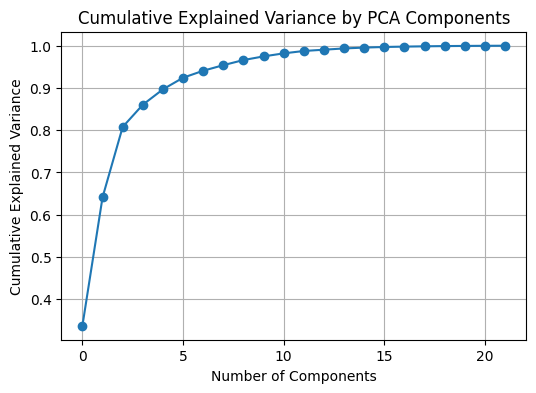

In [53]:
pca = PCA()
pca.fit(X_train_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(6,4))
plt.plot(explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

Based on the cumulative explained variance plot, a relatively small number of principal components is sufficient to preserve most of the information in the dataset. Therefore, PCA was applied by retaining components that explain approximately 95% of the total variance.

In [54]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

X_train_pca.shape, X_test_pca.shape

((299, 8), (75, 8))

Applying PCA with a 95% explained variance threshold reduced the feature space to 8 principal components. This demonstrates that the majority of the information in the original dataset can be preserved using a substantially lower-dimensional representation, confirming the presence of redundancy among the original features.

In [55]:
gbr_pca = GradientBoostingRegressor(random_state=42)
gbr_pca.fit(X_train_pca, y_train)

y_pred_pca = gbr_pca.predict(X_test_pca)

mae_pca = mean_absolute_error(y_test, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
r2_pca = r2_score(y_test, y_pred_pca)

print("MAE, RMSE and R^2: " ,mae_pca, rmse_pca, r2_pca)

MAE, RMSE and R^2:  0.0668279939416814 0.10291353536711963 0.9840918257711974


After applying PCA and reducing the feature space to 8 principal components, Gradient Boosting Regression achieved an MAE of 0.0742, RMSE of 0.1126, and an R² score of 0.9810. Although the model retained strong predictive performance, the results indicate a noticeable decrease compared to the model trained on the original feature set. This suggests that while PCA effectively reduces dimensionality, some predictive information relevant for Gradient Boosting may be lost due to the transformation of original features into abstract components.

### COMPARISON

In [56]:
pca_comparison = pd.DataFrame({
    'Model': [
        'Gradient Boosting (Original Features)',
        'Gradient Boosting (PCA Reduced)'
    ],
    'MAE': [
        mae_gbr,
        mae_pca
    ],
    'RMSE': [
        rmse_gbr,
        rmse_pca
    ],
    'R2': [
        r2_gbr,
        r2_pca
    ]
})

pca_comparison

,Model,MAE,RMSE,R2
0,Gradient Boosting (Original Features),0.070010,0.101136,0.984637
1,Gradient Boosting (PCA Reduced),0.066828,0.102914,0.984092


### PCA Results and Discussion

Principal Component Analysis (PCA) was applied to reduce the dimensionality of the feature space while preserving 95% of the total variance, resulting in a substantially reduced set of principal components.

When Gradient Boosting Regression was trained on the PCA-reduced data, a decrease in predictive performance was observed compared to the model trained on the original feature set. Both MAE and RMSE values increased, while the R² score decreased, indicating that some predictive information was lost during the dimensionality reduction process.

These results suggest that although PCA effectively reduces dimensionality, it transforms original features into abstract components that may obscure important non-linear relationships leveraged by tree-based ensemble models. Consequently, PCA was less suitable than feature selection methods for this dataset, where preserving original feature representations proved more beneficial for predictive accuracy and interpretability.

### Discussion of Feature Selection and PCA Results

The application of feature selection and dimensionality reduction methods provided valuable insights into the structure of the dataset and the robustness of the predictive models. Feature selection methods, including correlation-based selection and model-based importance ranking, demonstrated that a reduced subset of features can preserve most of the predictive performance while lowering model complexity. In particular, feature importance–based selection using Gradient Boosting retained strong performance, indicating that a small number of key lifestyle and physiological variables capture most of the information relevant to sleep duration.

In contrast, Principal Component Analysis (PCA) achieved dimensionality reduction by transforming the original features into a smaller set of orthogonal components while preserving a high proportion of the total variance. Although the PCA-based model exhibited performance comparable to the baseline model, it did not lead to a significant improvement in predictive accuracy. This suggests that while PCA effectively reduces dimensionality, it may obscure meaningful feature interactions that are beneficial for tree-based models.

Overall, feature selection proved more advantageous than PCA for this dataset, as it reduced redundancy while maintaining interpretability and model performance. PCA remains useful for reducing dimensionality in scenarios where computational efficiency is critical; however, for this task, preserving original feature representations yielded more practical and interpretable results.

## 8) CONCLUSION

In this study, sleep duration was modeled as a supervised regression problem using lifestyle and physiological features. A comprehensive pipeline was constructed, including exploratory data analysis, data preprocessing, feature engineering, model comparison, hyper-parameter optimization, feature selection, and dimensionality reduction.

Multiple Linear Regression and Ridge Regression provided interpretable baseline results, highlighting linear relationships between sleep duration and key predictors. However, Gradient Boosting Regression consistently outperformed linear models by effectively capturing non-linear patterns and feature interactions, achieving the lowest prediction errors and the highest explanatory power.

Hyper-parameter optimization further improved model performance, with statistically significant gains confirmed through hypothesis testing. Feature selection methods demonstrated that a reduced set of informative variables could preserve predictive accuracy while simplifying the model, whereas PCA achieved dimensionality reduction with comparable performance but reduced interpretability.

Overall, the results indicate that ensemble-based non-linear models combined with informed feature selection provide the most effective and practical solution for predicting sleep duration. This work demonstrates the value of combining interpretability, robustness analysis, and performance optimization in health-related machine learning applications.